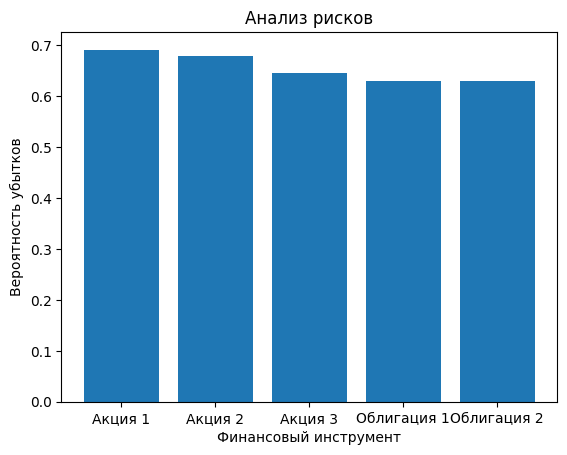

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Данные о финансовых инструментах
instruments_data = {
    'instrument': ['Акция 1', 'Акция 2', 'Акция 3', 'Облигация 1', 'Облигация 2'],
    'price': [100, 120, 80, 90, 110],
    'yield': [0.05, 0.07, 0.03, 0.04, 0.06],
    'volatility': [0.1, 0.15, 0.08, 0.12, 0.18]
}

# Данные об исторических ценах
historical_prices_data = {
    'instrument': ['Акция 1', 'Акция 2', 'Акция 3', 'Облигация 1', 'Облигация 2'],
    'date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'price_history': [100, 120, 80, 90, 110]
}

# Создаем датафреймы
instruments_df = pd.DataFrame(instruments_data)
historical_prices_df = pd.DataFrame(historical_prices_data)

# Объединяем датафреймы по instrument
data_df = pd.merge(instruments_df, historical_prices_df, on='instrument')

# Рассчитываем историческую волатильность
data_df['historical_volatility'] = data_df.groupby('instrument')['price_history'].pct_change().std()

# Рассчитываем вероятность убытков
def calculate_loss_probability(instrument, price, yield_, volatility):
    # Рассчитываем ожидаемую цену
    expected_price = price * (1 + yield_)

    # Рассчитываем стандартное отклонение
    std_dev = volatility * price

    # Рассчитываем вероятность убытков
    loss_probability = norm.cdf((expected_price - price) / std_dev)

    return loss_probability

# Применяем функцию к каждой строке
data_df['loss_probability'] = data_df.apply(lambda row: calculate_loss_probability(row['instrument'], row['price'], row['yield'], row['volatility']), axis=1)

# Визуализируем результаты
import matplotlib.pyplot as plt

plt.bar(data_df['instrument'], data_df['loss_probability'])
plt.xlabel('Финансовый инструмент')
plt.ylabel('Вероятность убытков')
plt.title('Анализ рисков')
plt.show()

Простая и понятная модель оценки вероятности убытка

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Данные о финансовых инструментах
instruments_data = {
    'instrument': np.random.choice(['Акция', 'Облигация', 'Фонд', 'Валюта'], size=100),
    'price': np.random.uniform(10, 1000, size=100),
    'yield': np.random.uniform(0.01, 0.1, size=100),
    'volatility': np.random.uniform(0.05, 0.5, size=100),
    'market_cap': np.random.uniform(1000000, 100000000, size=100),
    'sector': np.random.choice(['Технологии', 'Финансы', 'Здравоохранение', 'Промышленность'], size=100),
    'country': np.random.choice(['США', 'Китай', 'Европа', 'Япония'], size=100)
}

# Данные об исторических ценах
historical_prices_data = {
    'instrument': instruments_data['instrument'],
    'date': np.random.choice(pd.date_range('2020-01-01', '2022-12-31'), size=100),
    'price_history': np.random.uniform(10, 1000, size=100)
}

# Создаем датафреймы
instruments_df = pd.DataFrame(instruments_data)
historical_prices_df = pd.DataFrame(historical_prices_data)

# Объединяем все значения столбцов 'sector' и 'country'
all_sectors = instruments_df['sector'].unique().tolist()
all_countries = instruments_df['country'].unique().tolist()

# Обучаем LabelEncoder на всех значениях
le_sector = LabelEncoder()
le_sector.fit(all_sectors)

le_country = LabelEncoder()
le_country.fit(all_countries)

# Объединяем датафреймы
data_df = pd.merge(instruments_df, historical_prices_df, on='instrument')

# Преобразуем столбец 'sector' в числовые значения
data_df['sector'] = le_sector.transform(data_df['sector'])

# Преобразуем столбец 'country' в числовые значения
data_df['country'] = le_country.transform(data_df['country'])

# Определяем целевую переменную
target = 'price'

# Определяем признаки
features = ['yield', 'volatility', 'market_cap', 'sector', 'country', 'price_history']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data_df[features], data_df[target], test_size=0.2, random_state=42)

# Создаем и обучаем модель
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Оцениваем модель
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

def predict_instrument_price(instrument):
    # Подготавливаем данные
    data = pd.DataFrame({'instrument': [instrument]})
    data = pd.merge(data, instruments_df, on='instrument')
    data = pd.merge(data, historical_prices_df, on='instrument')

    # Преобразуем столбец 'sector' в числовые значения
    data['sector'] = le_sector.transform(data['sector'])

    # Преобразуем столбец 'country' в числовые значения
    data['country'] = le_country.transform(data['country'])

    # Прогнозируем цену
    price = model.predict(data[features])

    return price

# Пример использования
instrument = 'Акция'
price = predict_instrument_price(instrument)
print(f'Прогнозированная цена {instrument}: {price[0]:.2f}')

MSE: 0.37
Прогнозированная цена Акция: 363.89


Теперь о метрике MSE. Метрика MSE (Mean Squared Error) является одной из наиболее распространенных метрик для оценки качества прогнозирования в задачах регрессии. Она представляет собой среднее значение квадратов ошибок между прогнозированными и фактическими значениями.

В практике, метрика MSE может быть использована следующим образом:

Оценка качества прогнозирования: Метрика MSE может быть использована для оценки качества прогнозирования модели. Чем ниже значение MSE, тем лучше модель прогнозирует значения.
Сравнение моделей: Метрика MSE может быть использована для сравнения качества прогнозирования разных моделей. Модель с наименьшим значением MSE является лучшей.
Оптимизация гиперпараметров: Метрика MSE может быть использована для оптимизации гиперпараметров модели. Например, можно использовать алгоритм поиска по сетке для поиска оптимальных значений гиперпараметров, которые минимизируют значение MSE.
Мониторинг качества прогнозирования: Метрика MSE может быть использована для мониторинга качества прогнозирования модели в реальном времени. Если значение MSE начинает увеличиваться, это может указывать на то, что модель necesita быть переподготовлена или обновлена.

В нашем случае, значение MSE составляет 0.37, что означает, что модель прогнозирует значения с ошибкой в среднем 0.37. Это не является плохим результатом, но можно попытаться улучшить его, оптимизируя гиперпараметры модели или используя более сложные модели.Теперь о метрике MSE. Метрика MSE (Mean Squared Error) является одной из наиболее распространенных метрик для оценки качества прогнозирования в задачах регрессии. Она представляет собой среднее значение квадратов ошибок между прогнозированными и фактическими значениями.